<a href="https://colab.research.google.com/github/v-enigma/DL_LabExperiments/blob/main/Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement Gaussian Blur and Box Blur from scratch using OpenCV. Compare their effects on an image (lena.jpg) and explain when eachwould be preferred.

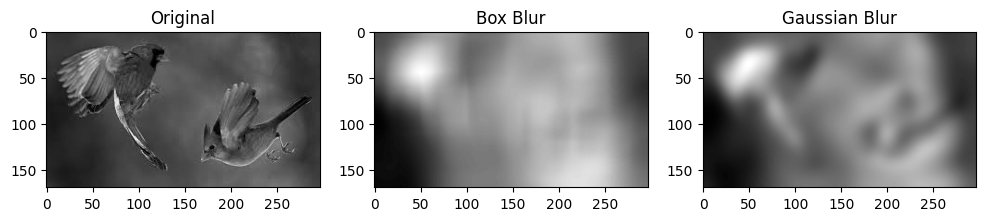

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("bird.jpeg", cv2.IMREAD_GRAYSCALE)
# Box Blur (Averaging)
kernel_size = 51
box_blur = cv2.blur(image, (kernel_size, kernel_size))
# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
# Display results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original")
plt.subplot(1, 3, 2)
plt.imshow(box_blur, cmap="gray")
plt.title("Box Blur")
plt.subplot(1, 3, 3)
plt.imshow(gaussian_blur, cmap="gray")
plt.title("Gaussian Blur")
plt.show()


Apply Sobel filters in both X and Y directions. Combine them to obtain edge magnitude and direction. Compare the results with theLaplacian filter.

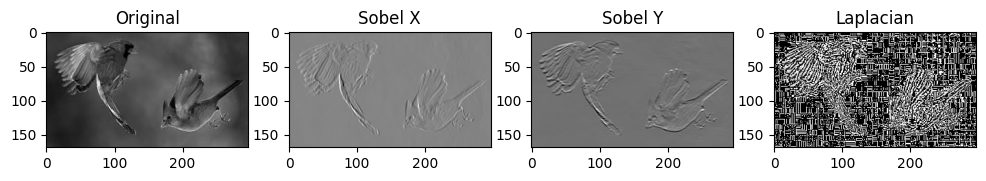

In [2]:
# Sobel Filters
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
# Compute Edge Magnitude
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.uint8(sobel_magnitude * 255 / np.max(sobel_magnitude))
# Laplacian Filter
laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=3)
laplacian = np.uint8(laplacian * 255 / np.max(laplacian))
# Display results
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap="gray")
plt.title("Original")
plt.subplot(1, 4, 2)
plt.imshow(sobel_x, cmap="gray")
plt.title("Sobel X")
plt.subplot(1, 4, 3)
plt.imshow(sobel_y, cmap="gray")
plt.title("Sobel Y")
plt.subplot(1, 4, 4)
plt.imshow(laplacian, cmap="gray")
plt.title("Laplacian")
plt.show()


Implement Canny edge detection without using cv2.Canny(). Use a combination of Gaussian blur, gradient detection (Sobel), andthresholding.

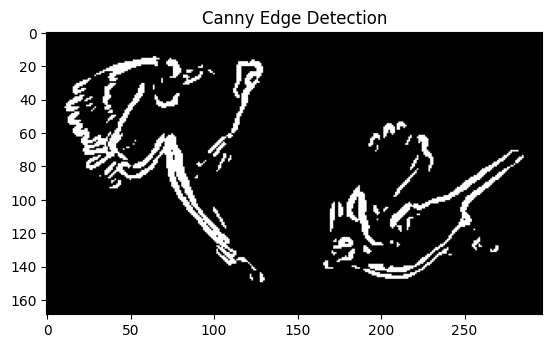

In [3]:
# Gaussian Blur
blurred = cv2.GaussianBlur(image, (5, 5), 1.4)
# Compute Sobel Gradients
grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
# Compute Gradient Magnitude and Angle
magnitude = np.sqrt(grad_x**2 + grad_y**2)
angle = np.arctan2(grad_y, grad_x) * 180 / np.pi
# Normalize Magnitude
magnitude = np.uint8(magnitude * 255 / np.max(magnitude))
# Apply Thresholding
_, thresholded = cv2.threshold(magnitude, 50, 255, cv2.THRESH_BINARY)
# Display result
plt.imshow(thresholded, cmap="gray")
plt.title("Canny Edge Detection")
plt.show()


Design a sharpening filter using a custom kernel and apply it to an image. Experiment with different kernel values and explain their effects.

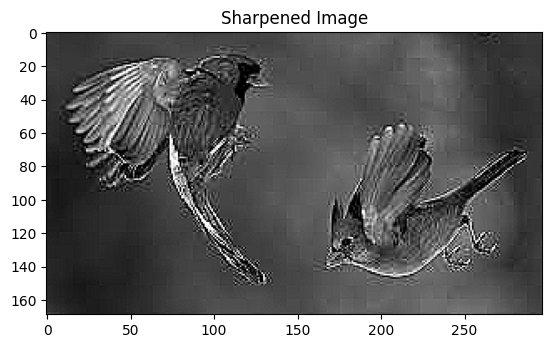

In [4]:

# Custom sharpening kernel
sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
# Apply filter
sharpened = cv2.filter2D(image, -1, sharpening_kernel)
# Display result
plt.imshow(sharpened, cmap="gray")
plt.title("Sharpened Image")
plt.show()


e) Apply an emboss filter to an image and modify its kernel to enhance the effect. What changes in the kernel result in a more pronouncedembossing effect?

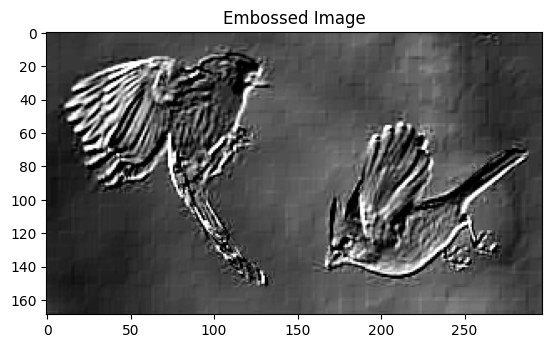

In [5]:
# Emboss kernel
emboss_kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
# Apply emboss filter
embossed = cv2.filter2D(image, -1, emboss_kernel)
# Display result
plt.imshow(embossed, cmap="gray")
plt.title("Embossed Image")
plt.show()


Create a high-pass filter using OpenCV and compare its effect with an edge enhancement filter. Discuss their applications in featureextraction for deep learning.

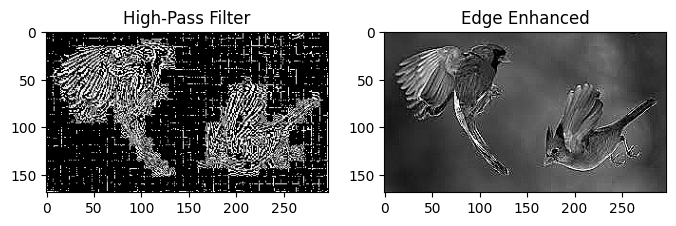

In [6]:
# High-pass filter (Laplacian)
high_pass = cv2.Laplacian(image, cv2.CV_64F)
high_pass = np.uint8(high_pass * 255 / np.max(high_pass))
# Edge Enhancement (Sharpening)
sharpened = cv2.filter2D(image, -1, sharpening_kernel)
# Display results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(high_pass, cmap="gray")
plt.title("High-Pass Filter")
plt.subplot(1, 2, 2)
plt.imshow(sharpened, cmap="gray")
plt.title("Edge Enhanced")
plt.show()

<h2>Indoor vs. Outdoor Image Classification:</h2>
a) Find and load indoor vs. outdoor image dataset (DIML/CVL RGB-D Dataset). Perform preprocessing steps including image resizing,normalization, and data augmentation. Explain why each step is necessary for deep learning models.
b) Design and train a convolutional neural network (CNN) from scratch for indoor vs. outdoor classification. Tune hyperparameters (numberof layers, kernel size, batch size, learning rate) and analyze how they affect the model’s performance.